<a href="https://colab.research.google.com/github/Vatsal-Patel-09/Machine_Learning_101/blob/main/LAB_9_RF_XG_AB_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Upload Kaggle.json to load API

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vatsalpatel09","key":"5aa080a79bc54096796e86a0fbf65f12"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Load dataset from kaggle API (URL = "https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset")

!kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
License(s): unknown
  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 40.6MB/s]


In [8]:
# STEP 4: Unzip the dataset
!unzip loan-prediction-problem-dataset.zip -d data/


Archive:  loan-prediction-problem-dataset.zip
  inflating: data/test_Y3wMUE5_7gLdaTN.csv  
  inflating: data/train_u6lujuX_CVtuZ9i.csv  


In [9]:
# STEP 5: Load the data into pandas
import pandas as pd

train_df = pd.read_csv("data/train_u6lujuX_CVtuZ9i.csv")
test_df = pd.read_csv("data/test_Y3wMUE5_7gLdaTN.csv")

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (614, 13)
Test data shape: (367, 12)


In [10]:
# Import utilities and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)
from sklearn.preprocessing import LabelEncoder


In [11]:
# Evaluation Function
def evaluate_model(model, X_train, X_val, y_train, y_val):
    """
    Train the model and evaluate it on validation data.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_val)

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    print("📊 Model Evaluation Metrics:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    return y_pred

In [12]:
# VISUALIZATION FUNCTION
def visualize_results(model, X_val, y_val, y_pred):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title("Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # ROC Curve
    if len(set(y_val)) == 2:  # Only for binary classification
        y_proba = model.predict_proba(X_val)[:,1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        auc = roc_auc_score(y_val, y_proba)

        axes[1].plot(fpr, tpr, label=f"AUC = {auc:.3f}")
        axes[1].plot([0,1], [0,1], linestyle='--', color='gray')
        axes[1].set_title("ROC Curve")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend()

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4)
    plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

train_df = train_df.dropna(subset=['Loan_Status'])
le = LabelEncoder()
train_df['Loan_Status'] = le.fit_transform(train_df['Loan_Status'])

X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

# Convert categorical to numeric
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Fill missing numeric values
X = X.fillna(X.median())

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train & Evaluate RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
y_pred = evaluate_model(rf_model, X_train, X_val, y_train, y_val)

📊 Model Evaluation Metrics:
Accuracy : 0.7805
Precision: 0.7573
Recall   : 0.9750
F1 Score : 0.8525


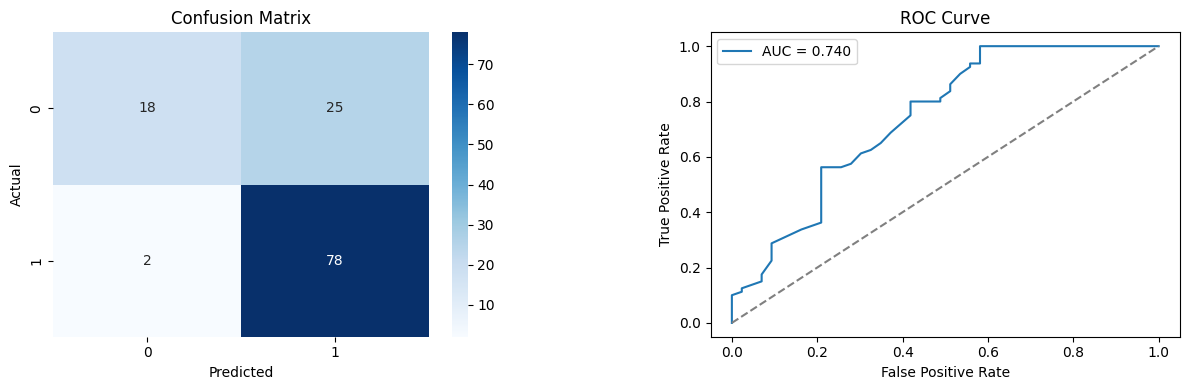

In [16]:
visualize_results(rf_model, X_val, y_val, y_pred)

In [17]:
# Train & Evaluate Ada Boost Classifier
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)

In [18]:
y_pred = evaluate_model(ab_model, X_train, X_val, y_train, y_val)

📊 Model Evaluation Metrics:
Accuracy : 0.7886
Precision: 0.7596
Recall   : 0.9875
F1 Score : 0.8587


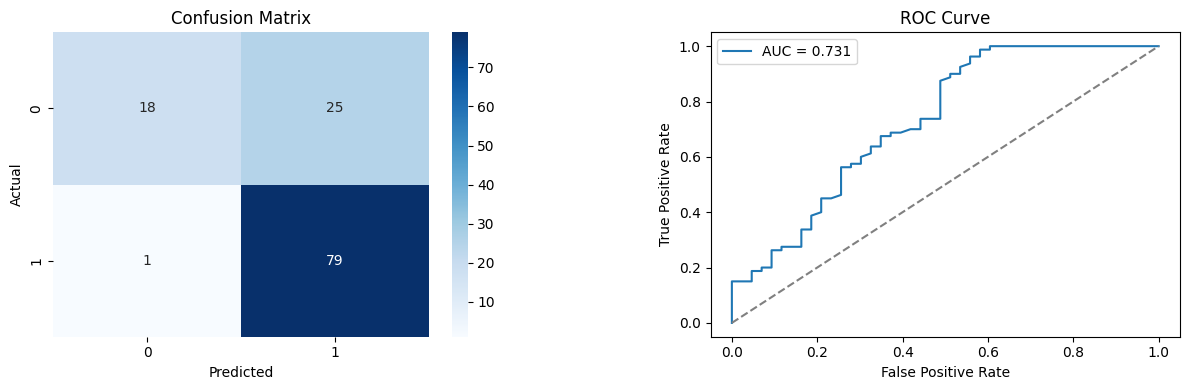

In [19]:
visualize_results(ab_model, X_val, y_val, y_pred)

In [20]:
# Train & Evaluate Gradient Boost Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [21]:
y_pred = evaluate_model(gb_model, X_train, X_val, y_train, y_val)

📊 Model Evaluation Metrics:
Accuracy : 0.7642
Precision: 0.7525
Recall   : 0.9500
F1 Score : 0.8398


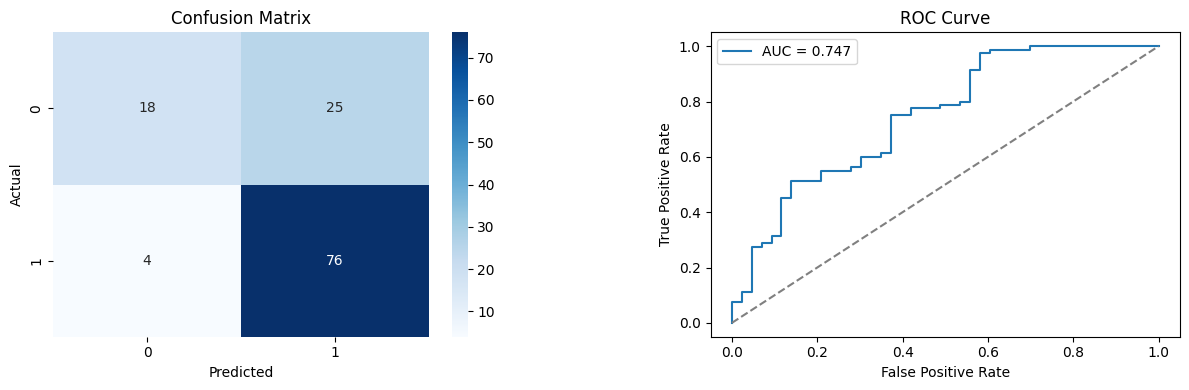

In [22]:
visualize_results(gb_model, X_val, y_val, y_pred)

📊 Model Evaluation Metrics:
Accuracy : 0.7236
Precision: 0.7500
Recall   : 0.8625
F1 Score : 0.8023


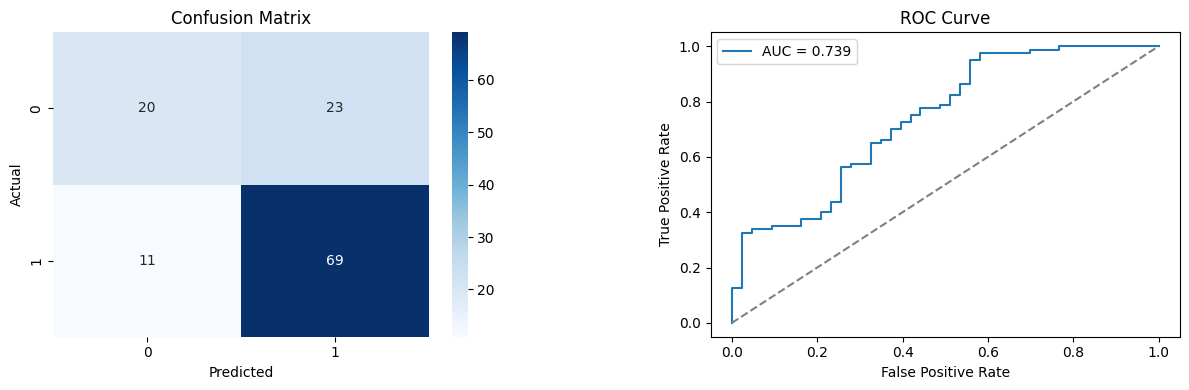

In [23]:
from xgboost import XGBClassifier

# Train & Evaluate XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_val, y_train, y_val)
visualize_results(xgb_model, X_val, y_val, y_pred_xgb)

📊 Model Evaluation Metrics:
Accuracy : 0.7236
Precision: 0.7500
Recall   : 0.8625
F1 Score : 0.8023


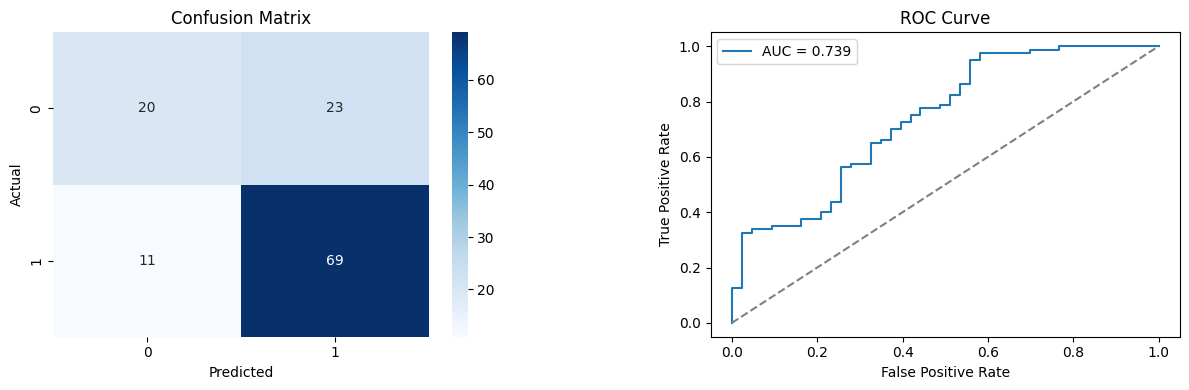

In [36]:
# Train & Evaluate XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_val, y_train, y_val)
visualize_results(xgb_model, X_val, y_val, y_pred_xgb)

📊 Model Evaluation Metrics:
Accuracy : 0.7236
Precision: 0.7500
Recall   : 0.8625
F1 Score : 0.8023


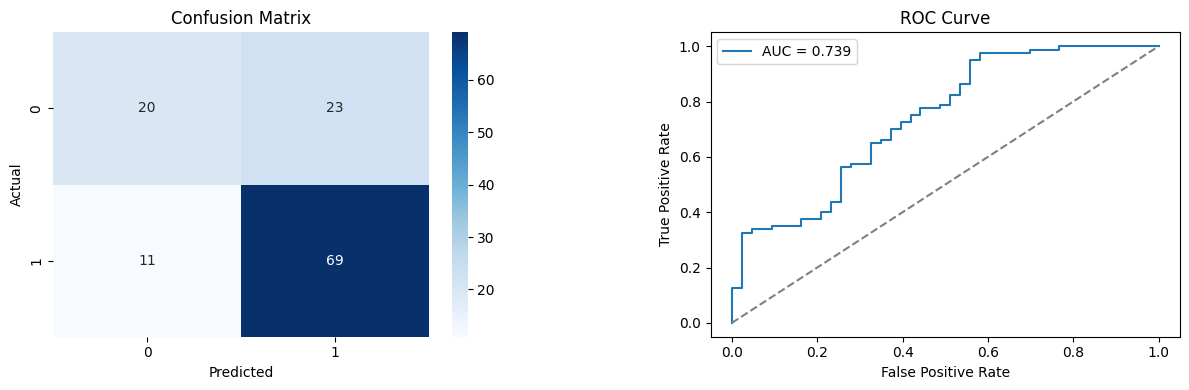

In [35]:
# Train & Evaluate XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_val, y_train, y_val)
visualize_results(xgb_model, X_val, y_val, y_pred_xgb)


📊 Model Evaluation Metrics:
Accuracy : 0.7236
Precision: 0.7500
Recall   : 0.8625
F1 Score : 0.8023


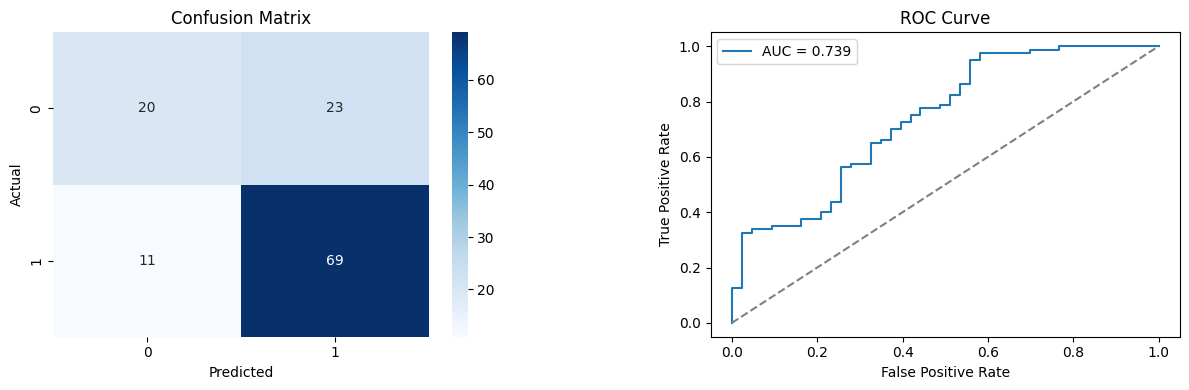

In [34]:
# Train & Evaluate XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_val, y_train, y_val)
visualize_results(xgb_model, X_val, y_val, y_pred_xgb)


📊 Model Evaluation Metrics:
Accuracy : 0.7236
Precision: 0.7500
Recall   : 0.8625
F1 Score : 0.8023


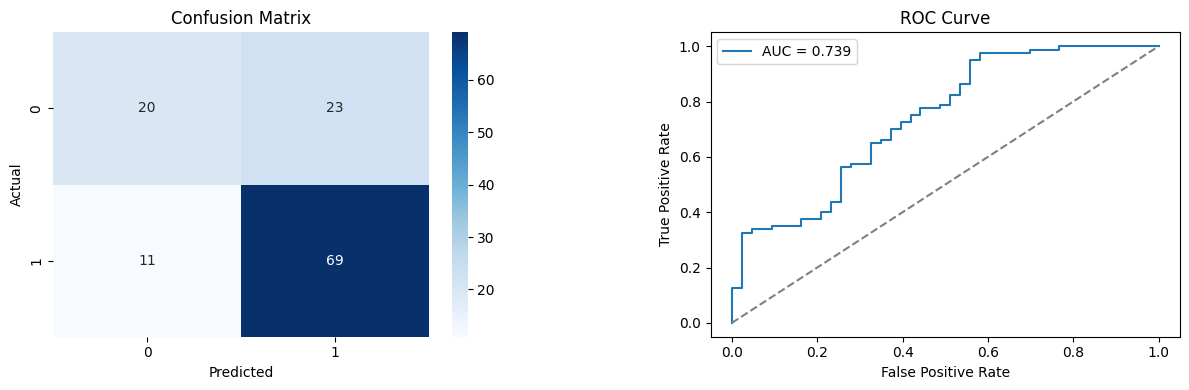

In [33]:
# Train & Evaluate XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_val, y_train, y_val)
visualize_results(xgb_model, X_val, y_val, y_pred_xgb)


## Create Ensemble Model

### Subtask:
Develop an ensemble model combining XGBoost, AdaBoost, and Gradient Boosting Classifiers. This could involve techniques like StackingClassifier or VotingClassifier. The base models should be the previously trained `ab_model`, `gb_model`, and the newly trained `xgb_model`.


In [38]:
from sklearn.ensemble import VotingClassifier

# Create a list of our models for the ensemble
estimators = [
    ('AdaBoost', ab_model),
    ('GradientBoost', gb_model),
    ('XGBoost', xgb_model)
]

# Instantiate the VotingClassifier
ensemble_model = VotingClassifier(
    estimators=estimators,
    voting='soft', # Use 'soft' voting for predicted probabilities
    weights=[1, 1, 1], # Assign equal weights to each model

)

print("Ensemble model created successfully.")

Ensemble model created successfully.


In [39]:
from sklearn.ensemble import VotingClassifier

# Create a list of our models for the ensemble
estimators = [
    ('AdaBoost', ab_model),
    ('GradientBoost', gb_model),
    ('XGBoost', xgb_model)
]

# Instantiate the VotingClassifier
ensemble_model = VotingClassifier(
    estimators=estimators,
    voting='soft', # Use 'soft' voting for predicted probabilities
    weights=[1, 1, 1] # Assign equal weights to each model
)

print("Ensemble model created successfully.")

Ensemble model created successfully.


📊 Model Evaluation Metrics:
Accuracy : 0.7561
Precision: 0.7500
Recall   : 0.9375
F1 Score : 0.8333


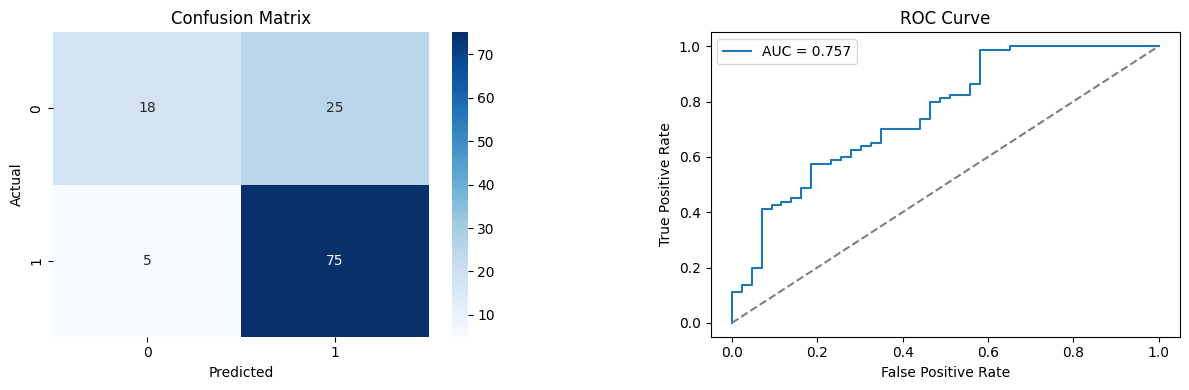

In [40]:
y_pred_ensemble = evaluate_model(ensemble_model, X_train, X_val, y_train, y_val)
visualize_results(ensemble_model, X_val, y_val, y_pred_ensemble)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def get_model_metrics(model, X_val, y_val, y_pred):
    """
    Calculates and returns performance metrics for a given model.
    """
    metrics = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred)
    }
    if hasattr(model, "predict_proba") and len(set(y_val)) == 2:
        y_proba = model.predict_proba(X_val)[:, 1]
        metrics["AUC"] = roc_auc_score(y_val, y_proba)
    else:
        metrics["AUC"] = None # Not applicable or not available
    return metrics

# Get metrics for Random Forest model
# Assuming y_pred from the Random Forest model is stored in the variable 'y_pred'
rf_metrics = get_model_metrics(rf_model, X_val, y_val, y_pred)

# Get metrics for Ensemble model
# Assuming y_pred from the Ensemble model is stored in the variable 'y_pred_ensemble'
ensemble_metrics = get_model_metrics(ensemble_model, X_val, y_val, y_pred_ensemble)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'Ensemble Model': ensemble_metrics
})

print("Model Performance Comparison:")
print(comparison_df)

print("\nNote: Confusion Matrix and ROC Curve visualizations for both models have been generated previously and can be compared visually above.")

Model Performance Comparison:
           Random Forest  Ensemble Model
Accuracy        0.764228        0.756098
Precision       0.752475        0.750000
Recall          0.950000        0.937500
F1 Score        0.839779        0.833333
AUC             0.740116        0.756686

Note: Confusion Matrix and ROC Curve visualizations for both models have been generated previously and can be compared visually above.


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:42:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost parameters found: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:42:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Model Evaluation Metrics:
Accuracy : 0.7886
Precision: 0.7596
Recall   : 0.9875
F1 Score : 0.8587


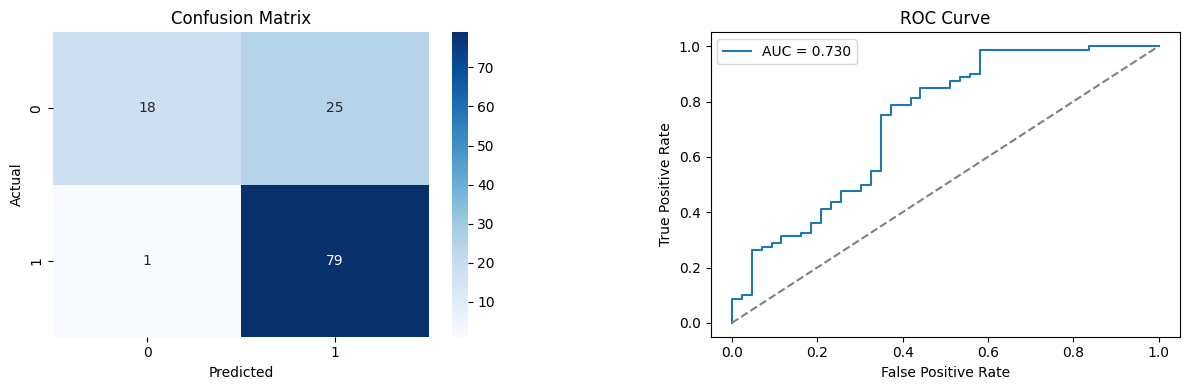

In [42]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 2. Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# 3. Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), # Set use_label_encoder=False and eval_metric
    param_grid=param_grid,
    cv=3, # Using 3-fold cross-validation for speed
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# 4. Fit the GridSearchCV object to training data
grid_search.fit(X_train, y_train)

# 5. Get the best estimator
best_xgb_model = grid_search.best_estimator_
print(f"Best XGBoost parameters found: {grid_search.best_params_}")

# 6. Evaluate the best_xgb_model
y_pred_best_xgb = evaluate_model(best_xgb_model, X_train, X_val, y_train, y_val)

# 7. Visualize the results of the best_xgb_model
visualize_results(best_xgb_model, X_val, y_val, y_pred_best_xgb)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best XGBoost parameters found: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}
📊 Model Evaluation Metrics:
Accuracy : 0.7886
Precision: 0.7596
Recall   : 0.9875
F1 Score : 0.8587


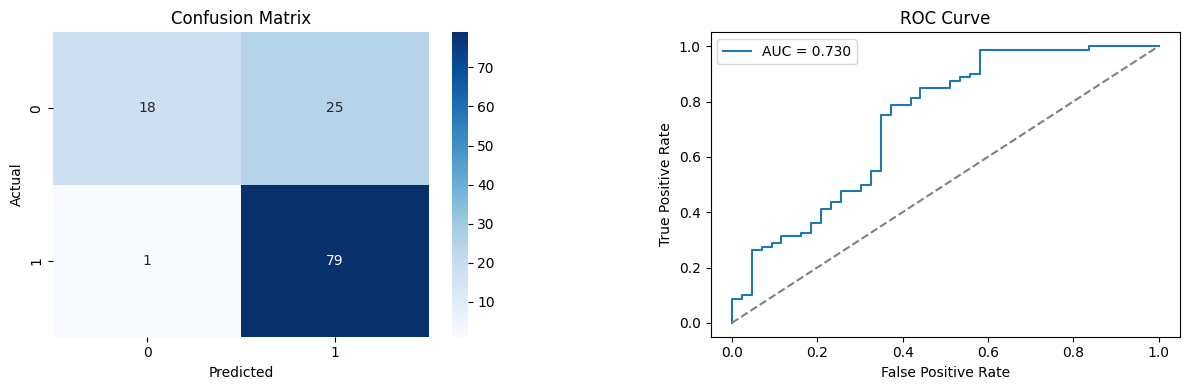

In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# 2. Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# 3. Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric='logloss'), # Removed use_label_encoder=False
    param_grid=param_grid,
    cv=3, # Using 3-fold cross-validation for speed
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# 4. Fit the GridSearchCV object to training data
grid_search.fit(X_train, y_train)

# 5. Get the best estimator
best_xgb_model = grid_search.best_estimator_
print(f"Best XGBoost parameters found: {grid_search.best_params_}")

# 6. Evaluate the best_xgb_model
y_pred_best_xgb = evaluate_model(best_xgb_model, X_train, X_val, y_train, y_val)

# 7. Visualize the results of the best_xgb_model
visualize_results(best_xgb_model, X_val, y_val, y_pred_best_xgb)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best AdaBoost parameters found: {'learning_rate': 0.5, 'n_estimators': 150}
📊 Model Evaluation Metrics:
Accuracy : 0.7886
Precision: 0.7596
Recall   : 0.9875
F1 Score : 0.8587


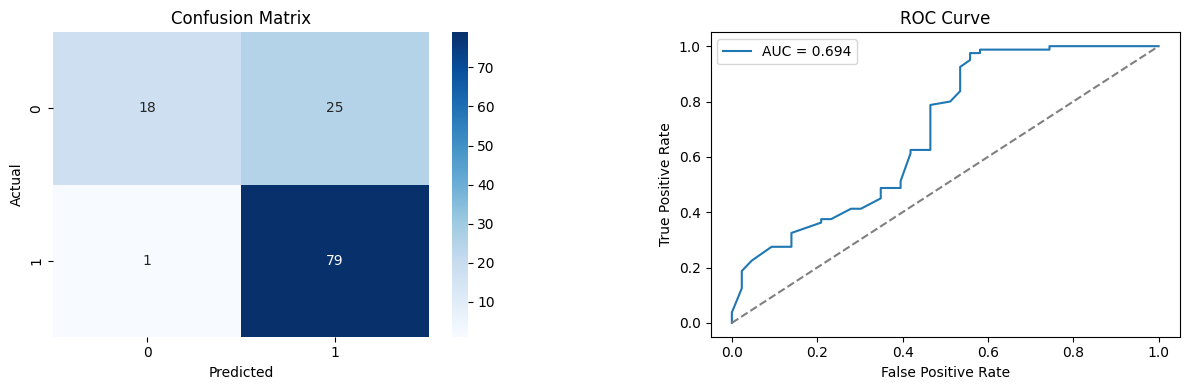

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# 1. Define a parameter grid for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 0.5]
}

# 2. Instantiate GridSearchCV
grid_search_ab = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid_ab,
    cv=3, # Using 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# 3. Fit the GridSearchCV object to training data
grid_search_ab.fit(X_train, y_train)

# 4. Get the best estimator
best_ab_model = grid_search_ab.best_estimator_
print(f"Best AdaBoost parameters found: {grid_search_ab.best_params_}")

# 5. Evaluate the best_ab_model
y_pred_best_ab = evaluate_model(best_ab_model, X_train, X_val, y_train, y_val)

# 6. Visualize the results of the best_ab_model
visualize_results(best_ab_model, X_val, y_val, y_pred_best_ab)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Gradient Boosting parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.7}
📊 Model Evaluation Metrics:
Accuracy : 0.7886
Precision: 0.7596
Recall   : 0.9875
F1 Score : 0.8587


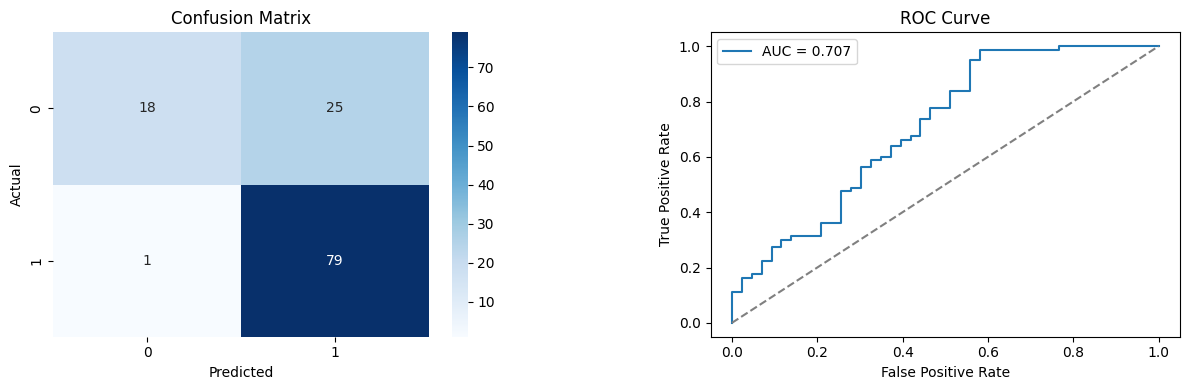

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# 1. Define a parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# 2. Instantiate GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=3, # Using 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# 3. Fit the GridSearchCV object to training data
grid_search_gb.fit(X_train, y_train)

# 4. Get the best estimator
best_gb_model = grid_search_gb.best_estimator_
print(f"Best Gradient Boosting parameters found: {grid_search_gb.best_params_}")

# 5. Evaluate the best_gb_model
y_pred_best_gb = evaluate_model(best_gb_model, X_train, X_val, y_train, y_val)

# 6. Visualize the results of the best_gb_model
visualize_results(best_gb_model, X_val, y_val, y_pred_best_gb)

Hyperparameter-tuned ensemble model created successfully.
📊 Model Evaluation Metrics:
Accuracy : 0.7886
Precision: 0.7596
Recall   : 0.9875
F1 Score : 0.8587


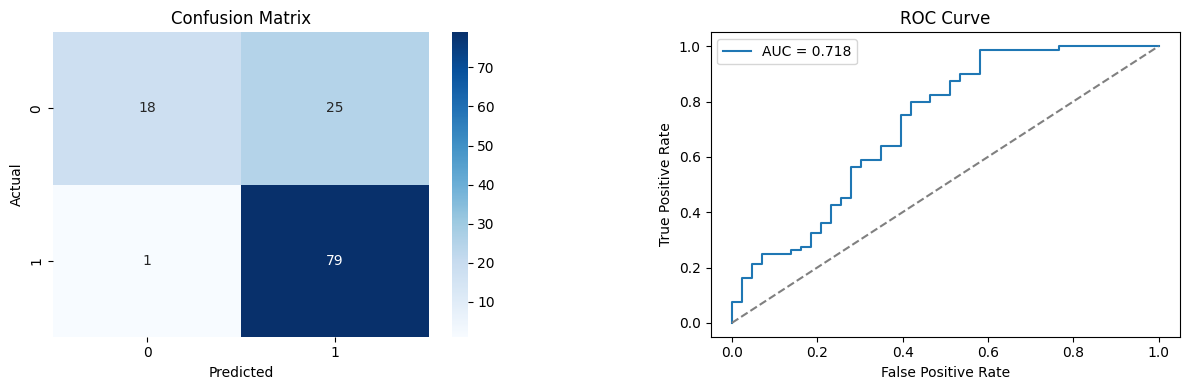

In [46]:
from sklearn.ensemble import VotingClassifier

# 1. Create a list of our hyperparameter-tuned models for the ensemble
estimators = [
    ('AdaBoost', best_ab_model),
    ('GradientBoost', best_gb_model),
    ('XGBoost', best_xgb_model)
]

# 2. Instantiate the VotingClassifier
ensemble_model_tuned = VotingClassifier(
    estimators=estimators,
    voting='soft', # Use 'soft' voting for predicted probabilities
    weights=[1, 1, 1] # Assign equal weights to each model
)

print("Hyperparameter-tuned ensemble model created successfully.")

# 3. Train and evaluate the new ensemble_model
y_pred_ensemble_tuned = evaluate_model(ensemble_model_tuned, X_train, X_val, y_train, y_val)

# 4. Visualize the results of the new ensemble_model
visualize_results(ensemble_model_tuned, X_val, y_val, y_pred_ensemble_tuned)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best ensemble weights found: {'weights': [1, 1, 2]}
📊 Model Evaluation Metrics:
Accuracy : 0.7886
Precision: 0.7596
Recall   : 0.9875
F1 Score : 0.8587


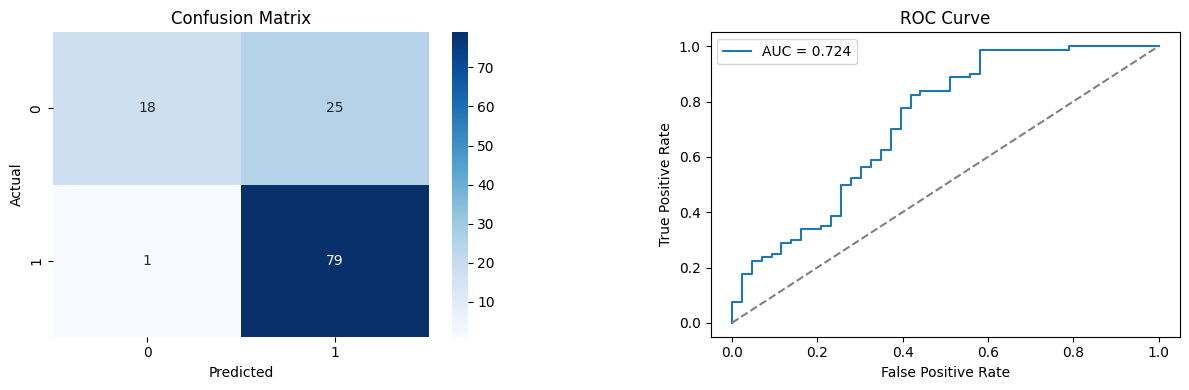

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# 1. Define a parameter grid for the weights of the VotingClassifier
# The order of weights corresponds to ('AdaBoost', 'GradientBoost', 'XGBoost')
param_grid_weights = {
    'weights': [
        [1, 1, 1], # Equal weights
        [1, 2, 1], # Boost GradientBoost
        [2, 1, 1], # Boost AdaBoost
        [1, 1, 2], # Boost XGBoost
        [1, 2, 2], # Boost GradientBoost and XGBoost
        [2, 1, 2], # Boost AdaBoost and XGBoost
        [2, 2, 1]  # Boost AdaBoost and GradientBoost
    ]
}

# Instantiate the VotingClassifier without initial weights (GridSearchCV will handle them)
# Use the 'estimators' list which contains best_ab_model, best_gb_model, best_xgb_model
# Make sure voting='soft' is set as per the instructions
voting_clf = VotingClassifier(
    estimators=estimators, # 'estimators' list is already defined with tuned models
    voting='soft'
)

# 2. Instantiate GridSearchCV
grid_search_weights = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid_weights,
    cv=3, # Using 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1, # Use all available cores
    verbose=1
)

# 3. Fit the GridSearchCV object to training data
grid_search_weights.fit(X_train, y_train)

# 4. Get the best estimator
best_ensemble_model_tuned = grid_search_weights.best_estimator_
print(f"Best ensemble weights found: {grid_search_weights.best_params_}")

# 5. Evaluate the best_ensemble_model_tuned
y_pred_best_ensemble_tuned = evaluate_model(best_ensemble_model_tuned, X_train, X_val, y_train, y_val)

# 6. Visualize the results of the best_ensemble_model_tuned
visualize_results(best_ensemble_model_tuned, X_val, y_val, y_pred_best_ensemble_tuned)

StackingClassifier initialized.
📊 Model Evaluation Metrics:
Accuracy : 0.7886
Precision: 0.7596
Recall   : 0.9875
F1 Score : 0.8587


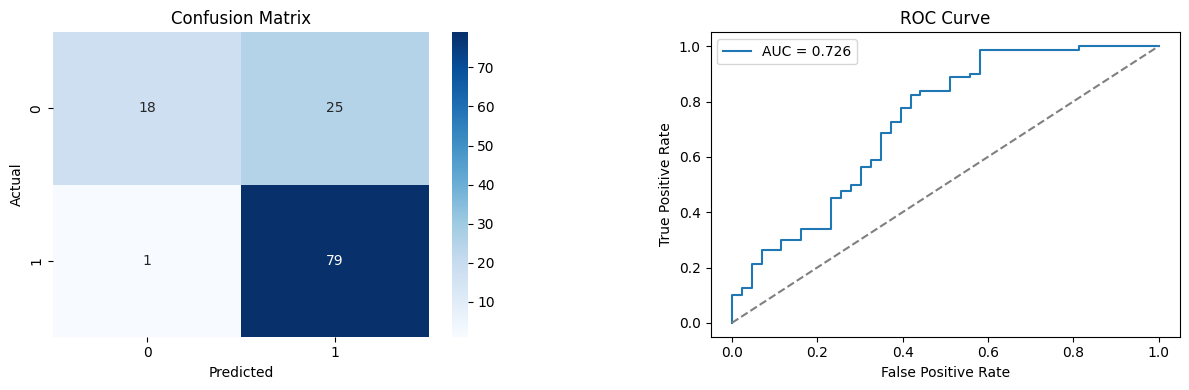

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# 1. Define base estimators (hyperparameter-tuned models)
base_estimators = [
    ('ab', best_ab_model),
    ('gb', best_gb_model),
    ('xgb', best_xgb_model)
]

# 2. Choose a meta-estimator
meta_estimator = LogisticRegression(random_state=42, solver='liblinear') # Added solver to avoid warning

# 3. Instantiate the StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_estimator,
    cv=3, # Cross-validation for stacking
    n_jobs=-1, # Use all available cores
    verbose=1
)

print("StackingClassifier initialized.")

# 4. Train the StackingClassifier
y_pred_stacking = evaluate_model(stacking_model, X_train, X_val, y_train, y_val)

# 5. Visualize the results
visualize_results(stacking_model, X_val, y_val, y_pred_stacking)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def get_model_metrics(model, X_val, y_val, y_pred):
    """
    Calculates and returns performance metrics for a given model.
    """
    metrics = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred)
    }
    if hasattr(model, "predict_proba") and len(set(y_val)) == 2:
        y_proba = model.predict_proba(X_val)[:, 1]
        metrics["AUC"] = roc_auc_score(y_val, y_proba)
    else:
        metrics["AUC"] = None # Not applicable or not available
    return metrics

# 1. Calculate the performance metrics for the best_ensemble_model_tuned
tuned_ensemble_metrics = get_model_metrics(best_ensemble_model_tuned, X_val, y_val, y_pred_best_ensemble_tuned)

# 2. Calculate the performance metrics for the stacking_model
stacking_metrics = get_model_metrics(stacking_model, X_val, y_val, y_pred_stacking)

# 3. Create a new Pandas DataFrame for comparison (assuming rf_metrics and ensemble_metrics are already available)
comparison_all_models_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'Original Ensemble': ensemble_metrics,
    'Tuned Ensemble (Voting)': tuned_ensemble_metrics,
    'Stacking Classifier': stacking_metrics
})

# 4. Print the comparison DataFrame
print("\nComprehensive Model Performance Comparison:")
print(comparison_all_models_df)



Comprehensive Model Performance Comparison:
           Random Forest  Original Ensemble  Tuned Ensemble (Voting)  \
Accuracy        0.764228           0.756098                 0.788618   
Precision       0.752475           0.750000                 0.759615   
Recall          0.950000           0.937500                 0.987500   
F1 Score        0.839779           0.833333                 0.858696   
AUC             0.740116           0.756686                 0.724128   

           Stacking Classifier  
Accuracy              0.788618  
Precision             0.759615  
Recall                0.987500  
F1 Score              0.858696  
AUC                   0.726163  
